In [2]:
!pip -q install geopandas
import geopandas as gpd
import numpy as np
import os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.7 MB/s eta 0:00:00


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"


Mounted at /content/drive


# Load shapefiles

In [4]:
# read AOIs
aois1 = gpd.read_file(my_drive_path+'/map_data/aois.geojson')
aois1.aoi_name = "galbyveien"

aois2 = gpd.read_file(my_drive_path+'/map_data/test_plots.geojson')

# Merge AOIs
aois = gpd.pd.concat([aois1, aois2])
aois = aois.drop([8,9,10])

In [13]:
import glob
import os

# List file names with a specific pattern
file_pattern = my_drive_path+"/tiles/10m_*"
file_names = [os.path.basename(file) for file in glob.glob(file_pattern)]
file_names

['10m_krakstad_202304_sun',
 '10m_ortho_hobol_042222_mavic_sun',
 '10m_galbyveien_20230504_sun',
 '10m_braatan_40m_20230605_sun']

In [16]:
# Red predictions
import os
areas = file_names #os.listdir(my_drive_path+"/tiles")

pred_boxes_20 = [my_drive_path+"/tiles/"+area+"/"+area+"_predictions_20.shp" for area in areas]
pred_boxes_full_data = [my_drive_path+"/tiles/"+area+"/"+area+"_predictions_full_data.shp" for area in areas]

# Read test annotations
ref_boxes = gpd.read_file('/content/drive/MyDrive/NOVA_course_deep_learning/data/map_data/test_annotations2_sun.geojson')

In [17]:
pred_boxes_20

['/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_krakstad_202304_sun/10m_krakstad_202304_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_ortho_hobol_042222_mavic_sun/10m_ortho_hobol_042222_mavic_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_galbyveien_20230504_sun/10m_galbyveien_20230504_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_braatan_40m_20230605_sun/10m_braatan_40m_20230605_sun_predictions_20.shp']

# 1. Assess predictions from my annotations
## 1.1. Plots

In [18]:
pred_boxes_20

['/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_krakstad_202304_sun/10m_krakstad_202304_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_ortho_hobol_042222_mavic_sun/10m_ortho_hobol_042222_mavic_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_galbyveien_20230504_sun/10m_galbyveien_20230504_sun_predictions_20.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_braatan_40m_20230605_sun/10m_braatan_40m_20230605_sun_predictions_20.shp']

In [19]:
# my predictions: merge all files

import geopandas as gpd
import pandas as pd

# Assuming you have a list of shapefile names in 'file_names'
file_names =pred_boxes_20

# Read the shapefiles into individual GeoDataFrames
dataframes = [gpd.read_file(file) for file in file_names]

# Merge the individual GeoDataFrames into a single GeoDataFrame
merged_dataframe = gpd.GeoDataFrame(pd.concat(dataframes, ignore_index=True))


pred_boxes = merged_dataframe


In [21]:
pred_boxes.to_file("/content/drive/MyDrive/HOME_EXAM/data/tiles/prediction_boxes_20.shp")

In [20]:
aois["aoi_name"]

0     galbyveien
1     galbyveien
2     galbyveien
3     galbyveien
0          hobol
1          hobol
2          hobol
3          hobol
4       krakstad
5       krakstad
6       krakstad
7       krakstad
11      braatan2
12      braatan2
13      braatan1
14      braatan1
Name: aoi_name, dtype: object

<ipython-input-22-c1d8877e3ad5>:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


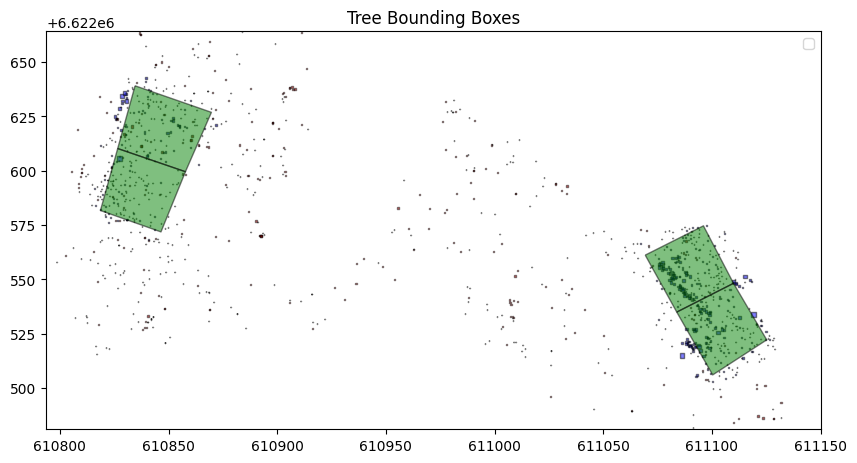

In [22]:
import matplotlib.pyplot as plt

target_aoi = aois[aois['aoi_name'].str.contains('braatan')]

# Plotting the shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot predicted boxes
pred_boxes.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Predicted Boxes')

# Plot reference boxes
ref_boxes.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Reference Boxes')

# Plot AOI
aois.plot(ax=ax, color='green', edgecolor='black', alpha=0.5, label='AOI')

# Zoom to the extent of predicted boxes
ax.set_xlim(target_aoi.total_bounds[0]-25, target_aoi.total_bounds[2]+25)
ax.set_ylim(target_aoi.total_bounds[1]-25, target_aoi.total_bounds[3]+25)

# Set plot title and legend
plt.title('Tree Bounding Boxes')
plt.legend()

# Display the plot
plt.show()

## 1.2. Compute residuals

In [23]:
aois

,id,aoi_name,geometry
0,NaN,galbyveien,"MULTIPOLYGON (((594269.014 6609757.765, 594234..."
1,NaN,galbyveien,"MULTIPOLYGON (((594234.465 6609756.975, 594269..."
2,NaN,galbyveien,"MULTIPOLYGON (((594273.794 6609722.675, 594304..."
3,NaN,galbyveien,"MULTIPOLYGON (((594258.021 6609690.758, 594295..."
0,NaN,hobol,"MULTIPOLYGON (((606105.331 6605888.259, 606076..."
1,NaN,hobol,"MULTIPOLYGON (((606028.264 6605888.504, 606058..."
2,NaN,hobol,"MULTIPOLYGON (((606027.129 6605853.801, 606059..."
3,NaN,hobol,"MULTIPOLYGON (((606028.635 6605818.489, 606057..."
4,NaN,krakstad,"MULTIPOLYGON (((607221.816 6613114.306, 607248..."
5,NaN,krakstad,"MULTIPOLYGON (((607248.032 6613091.649, 607273..."


In [24]:
# Initialize lists to store residuals for each AOI
residuals = []

# Compute residuals for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    residual = num_pred_within_aoi - num_ref_within_aoi
    residuals.append(residual)




In [25]:
residuals_20 = residuals
residuals

[-54, -59, 15, -2, -10, -1, 13, 14, -22, -14, 0, 6, -56, -72, -168, -116]

## scatterplot of reference Vs predicted

In [26]:
import pandas as pd

# Create empty lists to store the values
num_pred_within_aoi_list = []
num_ref_within_aoi_list = []
aoi_name_list = []

for _, aoi in aois.iterrows():
    aoi_geom = aoi['geometry']
    aoi_name = aoi['aoi_name']
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    # Append the values to the respective lists
    num_pred_within_aoi_list.append(num_pred_within_aoi)
    num_ref_within_aoi_list.append(num_ref_within_aoi)
    aoi_name_list.append(aoi_name)

# Create a DataFrame with the lists
table_data = {
    'aoi_name': aoi_name_list,
    'num_ref_within_aoi_list': num_ref_within_aoi_list,
    'num_pred_within_aoi_list': num_pred_within_aoi_list
}
df = pd.DataFrame(table_data)

# Print the table
print(df)


      aoi_name  num_ref_within_aoi_list  num_pred_within_aoi_list
0   galbyveien                      283                       229
1   galbyveien                      264                       205
2   galbyveien                      167                       182
3   galbyveien                      355                       353
4        hobol                      111                       101
5        hobol                      129                       128
6        hobol                      112                       125
7        hobol                      116                       130
8     krakstad                      162                       140
9     krakstad                      140                       126
10    krakstad                      132                       132
11    krakstad                      131                       137
12    braatan2                       99                        43
13    braatan2                      109                        37
14    braa

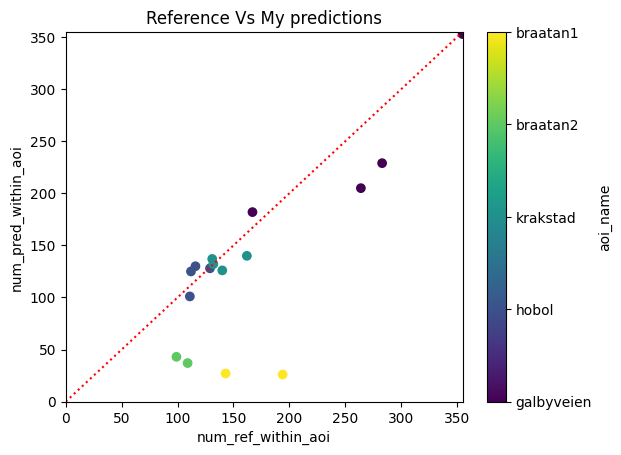

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Map unique aoi_name values to numerical values
aoi_name_mapping = {name: i for i, name in enumerate(df['aoi_name'].unique())}
color_labels = np.array([aoi_name_mapping[name] for name in df['aoi_name']])

# Create the scatter plot
plt.scatter(df['num_ref_within_aoi_list'], df['num_pred_within_aoi_list'], c=color_labels)

# Set limits for X and Y axes
max_value = max(df[['num_ref_within_aoi_list', 'num_pred_within_aoi_list']].max())
plt.xlim(0, max_value)
plt.ylim(0, max_value)

# Set labels and title
plt.xlabel('num_ref_within_aoi')
plt.ylabel('num_pred_within_aoi')
plt.title('Reference Vs My predictions')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('aoi_name')

# Add a dotted line of 45 degrees
plt.plot([0, max_value], [0, max_value], linestyle='dotted', color='red')


# Map numerical values back to aoi_name for colorbar ticks
cbar.set_ticks(list(aoi_name_mapping.values()))
cbar.set_ticklabels(list(aoi_name_mapping.keys()))

# Show the plot
plt.show()


## 1.3. Compute RMSE

In [28]:
# Compute RMSE
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias= np.mean(residuals)
print("the RMSE is: "+ str(rmse))
print("the bias is: "+ str(bias))

the RMSE is: 60.108235708594876
the bias is: -32.875


In [29]:
# Print residuals and RMSE
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    print("Residual for AOI "+ str(aoi_name) + ": " +str(residuals[i]))

print("RMSE:"+  str(rmse))

Residual for AOI galbyveien: -54
Residual for AOI galbyveien: -59
Residual for AOI galbyveien: 15
Residual for AOI galbyveien: -2
Residual for AOI hobol: -10
Residual for AOI hobol: -1
Residual for AOI hobol: 13
Residual for AOI hobol: 14
Residual for AOI krakstad: -22
Residual for AOI krakstad: -14
Residual for AOI krakstad: 0
Residual for AOI krakstad: 6
Residual for AOI braatan2: -56
Residual for AOI braatan2: -72
Residual for AOI braatan1: -168
Residual for AOI braatan1: -116
RMSE:60.108235708594876


## 1.4. Now we are going to per hectare values

In [30]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [33]:

# Print box density for each AOI
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI "+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()


Box density for AOI galbyveien:
Predicted density (boxes/ha):1856.7248342872526
Reference density (boxes/ha):2294.555144555862

Box density for AOI galbyveien:
Predicted density (boxes/ha):1752.9973259881008
Reference density (boxes/ha):2257.5185076139446

Box density for AOI galbyveien:
Predicted density (boxes/ha):1466.9945313452145
Reference density (boxes/ha):1346.0883886519275

Box density for AOI galbyveien:
Predicted density (boxes/ha):2193.801914777497
Reference density (boxes/ha):2206.2313873824687

Box density for AOI hobol:
Predicted density (boxes/ha):937.019071738087
Reference density (boxes/ha):1029.7932372567095

Box density for AOI hobol:
Predicted density (boxes/ha):1160.3005862662299
Reference density (boxes/ha):1169.3654345964346

Box density for AOI hobol:
Predicted density (boxes/ha):1140.1730121328987
Reference density (boxes/ha):1021.5950188710773

Box density for AOI hobol:
Predicted density (boxes/ha):1254.62437829526
Reference density (boxes/ha):1119.510983709

In [34]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("relative RMSE of box density (%):"+ str(rmse_rel))

print("bias of box density (boxes/ha):"+ str(bias))
print("relative bias of box density (%):"+ str(bias_rel))


RMSE of box density (boxes/ha):641.8792921987671
relative RMSE of box density (%):43.58175738832441
bias of box density (boxes/ha):-338.65156037293184
relative bias of box density (%):-22.993466719877087


# 2. Assess predictions from all annotations
## 2.1. Plots

In [36]:
pred_boxes_full_data

['/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_krakstad_202304_sun/10m_krakstad_202304_sun_predictions_full_data.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_ortho_hobol_042222_mavic_sun/10m_ortho_hobol_042222_mavic_sun_predictions_full_data.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_galbyveien_20230504_sun/10m_galbyveien_20230504_sun_predictions_full_data.shp',
 '/content/drive/MyDrive/HOME_EXAM/data/tiles/10m_braatan_40m_20230605_sun/10m_braatan_40m_20230605_sun_predictions_full_data.shp']

In [35]:
# my predictions: merge all files

import geopandas as gpd
import pandas as pd

# Assuming you have a list of shapefile names in 'file_names'
file_names =pred_boxes_full_data

# Read the shapefiles into individual GeoDataFrames
dataframes = [gpd.read_file(file) for file in file_names]

# Merge the individual GeoDataFrames into a single GeoDataFrame
merged_dataframe = gpd.GeoDataFrame(pd.concat(dataframes, ignore_index=True))


pred_boxes = merged_dataframe


In [152]:
pred_boxes.to_file("/content/drive/MyDrive/HOME_EXAM/data/tiles/prediction_boxes_full_data.shp")

In [37]:
# Initialize lists to store residuals for each AOI
residuals = []

# Compute residuals for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    residual = num_pred_within_aoi - num_ref_within_aoi
    residuals.append(residual)


In [38]:
residuals_full_data = residuals
residuals

[-58, -38, 52, 15, 15, 45, 55, 60, 51, 91, 74, 115, -12, -47, -158, -90]

## scatterplot of reference Vs predicted

In [39]:
import pandas as pd

# Create empty lists to store the values
num_pred_within_aoi_list = []
num_ref_within_aoi_list = []
aoi_name_list = []

for _, aoi in aois.iterrows():
    aoi_geom = aoi['geometry']
    aoi_name = aoi['aoi_name']
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    # Append the values to the respective lists
    num_pred_within_aoi_list.append(num_pred_within_aoi)
    num_ref_within_aoi_list.append(num_ref_within_aoi)
    aoi_name_list.append(aoi_name)

# Create a DataFrame with the lists
table_data = {
    'aoi_name': aoi_name_list,
    'num_ref_within_aoi_list': num_ref_within_aoi_list,
    'num_pred_within_aoi_list': num_pred_within_aoi_list
}
df = pd.DataFrame(table_data)

# Print the table
print(df)


      aoi_name  num_ref_within_aoi_list  num_pred_within_aoi_list
0   galbyveien                      283                       225
1   galbyveien                      264                       226
2   galbyveien                      167                       219
3   galbyveien                      355                       370
4        hobol                      111                       126
5        hobol                      129                       174
6        hobol                      112                       167
7        hobol                      116                       176
8     krakstad                      162                       213
9     krakstad                      140                       231
10    krakstad                      132                       206
11    krakstad                      131                       246
12    braatan2                       99                        87
13    braatan2                      109                        62
14    braa

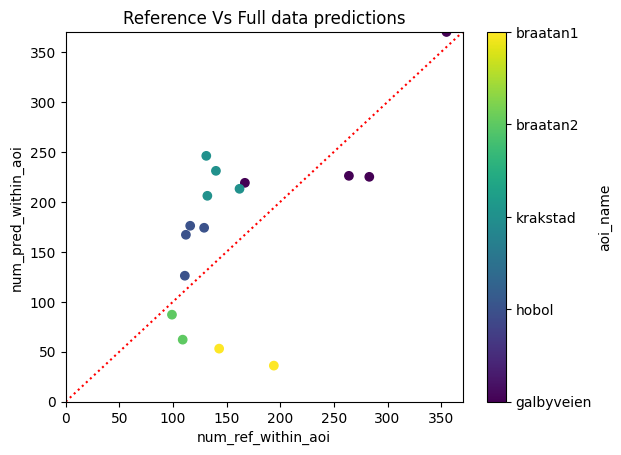

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Map unique aoi_name values to numerical values
aoi_name_mapping = {name: i for i, name in enumerate(df['aoi_name'].unique())}
color_labels = np.array([aoi_name_mapping[name] for name in df['aoi_name']])

# Create the scatter plot
plt.scatter(df['num_ref_within_aoi_list'], df['num_pred_within_aoi_list'], c=color_labels)

# Set limits for X and Y axes
max_value = max(df[['num_ref_within_aoi_list', 'num_pred_within_aoi_list']].max())
plt.xlim(0, max_value)
plt.ylim(0, max_value)

# Set labels and title
plt.xlabel('num_ref_within_aoi')
plt.ylabel('num_pred_within_aoi')
plt.title('Reference Vs Full data predictions')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('aoi_name')

# Add a dotted line of 45 degrees
plt.plot([0, max_value], [0, max_value], linestyle='dotted', color='red')


# Map numerical values back to aoi_name for colorbar ticks
cbar.set_ticks(list(aoi_name_mapping.values()))
cbar.set_ticklabels(list(aoi_name_mapping.keys()))

# Show the plot
plt.show()

## 2.2. Compute RMSE

In [41]:
# Compute RMSE
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias= np.mean(residuals)
print("the RMSE is: "+ str(rmse))
print("the bias is: "+ str(bias))

the RMSE is: 71.41953514270448
the bias is: 10.625


In [42]:
# Print residuals and RMSE
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    print("Residual for AOI "+ str(aoi_name) + ": " +str(residuals[i]))

print("RMSE:"+  str(rmse))

Residual for AOI galbyveien: -58
Residual for AOI galbyveien: -38
Residual for AOI galbyveien: 52
Residual for AOI galbyveien: 15
Residual for AOI hobol: 15
Residual for AOI hobol: 45
Residual for AOI hobol: 55
Residual for AOI hobol: 60
Residual for AOI krakstad: 51
Residual for AOI krakstad: 91
Residual for AOI krakstad: 74
Residual for AOI krakstad: 115
Residual for AOI braatan2: -12
Residual for AOI braatan2: -47
Residual for AOI braatan1: -158
Residual for AOI braatan1: -90
RMSE:71.41953514270448


## 2.3. Now we are going to per hectare values

In [43]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes[pred_boxes.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [44]:

# Print box density for each AOI
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI "+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()


Box density for AOI galbyveien:
Predicted density (boxes/ha):1824.2929594525408
Reference density (boxes/ha):2294.555144555862

Box density for AOI galbyveien:
Predicted density (boxes/ha):1932.572661821028
Reference density (boxes/ha):2257.5185076139446

Box density for AOI galbyveien:
Predicted density (boxes/ha):1765.229683321989
Reference density (boxes/ha):1346.0883886519275

Box density for AOI galbyveien:
Predicted density (boxes/ha):2299.4524319197562
Reference density (boxes/ha):2206.2313873824687

Box density for AOI hobol:
Predicted density (boxes/ha):1168.9544855346433
Reference density (boxes/ha):1029.7932372567095

Box density for AOI hobol:
Predicted density (boxes/ha):1577.283609455656
Reference density (boxes/ha):1169.3654345964346

Box density for AOI hobol:
Predicted density (boxes/ha):1523.2711442095529
Reference density (boxes/ha):1021.5950188710773

Box density for AOI hobol:
Predicted density (boxes/ha):1698.5683890766595
Reference density (boxes/ha):1119.5109837

In [45]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("relative RMSE of box density (%):"+ str(rmse_rel))

print("bias of box density (boxes/ha):"+ str(bias))
print("relative bias of box density (%):"+ str(bias_rel))


RMSE of box density (boxes/ha):715.1181101477601
relative RMSE of box density (%):48.55446243435706
bias of box density (boxes/ha):65.51646644200262
relative bias of box density (%):4.448379594292106
